<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Build/blob/master/Copy2_of_TheBee_2_of_2_notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install chart_studio

In [0]:
import chart_studio.plotly as plt
import numpy as np
import pandas as pd

In [0]:
column_headers = ['year','season','state','total_annual_loss', 'beekeepers', 'beekeepers_exculsive_to_state','colonies','colonies_exclusive_to_state','total_loss']

df=pd.read_csv('http://marso.space/bee/bee_colony_loss.csv', header=None, names=column_headers)

Unable to get a colony abount from total_annual_loss percent against colonies, I took the csv file into excel where I was able to get the actual total loss of colonies in an individual column named total_loss.


In [0]:
df.head(20)

,year,season,state,total_annual_loss,beekeepers,beekeepers_exculsive_to_state,colonies,colonies_exclusive_to_state,total_loss
0,2016/17,Annual,Massachusetts,0.159,87,0.94,"27,186.00",0.02,4322.57
1,2016/17,Annual,Montana,0.171,21,0.52,"35,905.00",0,6139.76
2,2016/17,Annual,Nevada,0.230,13,0.92,"2,512.00",0.05,577.76
3,2016/17,Annual,Maine,0.233,65,0.94,"41,102.00",0.01,9576.77
4,2016/17,Annual,Wyoming,0.234,18,0.78,"6,521.00",0.01,1525.91
5,2016/17,Annual,Hawaii,0.262,10,1,84,1,22.01
6,2016/17,Annual,Mississippi,0.263,9,0.22,"17,802.00",0,4681.93
7,2016/17,Annual,West Virginia,0.266,52,0.94,993,0.8,264.14
8,2016/17,Annual,Idaho,0.273,30,0.83,"76,794.00",0.02,20964.76
9,2016/17,Annual,Florida,0.292,62,0.82,"95,872.00",0.04,27994.62


In [0]:
df.dtypes

year                              object
season                            object
state                             object
total_annual_loss                float64
beekeepers                         int64
beekeepers_exculsive_to_state     object
colonies                          object
colonies_exclusive_to_state       object
total_loss                       float64
dtype: object

In [0]:
dd=df

In [0]:
dd.dtypes

year                              object
season                            object
state                             object
total_annual_loss                float64
beekeepers                         int64
beekeepers_exculsive_to_state     object
colonies                          object
colonies_exclusive_to_state       object
total_loss                       float64
dtype: object

Using the groupby with year and state unstacked the dataframe placing the states on top row and the years to the left column.
This was done in order to (T) transform the dataframe putting the years across the top with the states in rows on the allowing
for totals on the bottom and the mean on the right of the dataframe.

In [0]:
g=dd.groupby(['year','state']).agg({'total_loss':'mean'}).unstack(level=1)

In [0]:
g.columns= g.columns.get_level_values(1)

In [0]:
g.head()

state,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,MultiStateOperation,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010/11,63.80,466.23,29.01,46584.22,286.77,291.04,15.99,NaN,7861.05,5016.78,417.67,2370.44,594.08,2203.42,836.86,68.08,144.05,3913.31,4925.49,363.38,327.17,8617.20,16310.65,13318.83,203.19,4031.52,43567.42,2056.74,NaN,165.90,84.94,2.99,5582.16,1452.87,15422.00,378.25,216.14,3245.89,6289.92,55.03,291.15,1255.30,151.06,13558.59,634.14,305.32,608.33,4369.26,400.07,2417.50,NaN
2011/12,157.14,120.06,134.92,46297.40,337.69,96.14,241.11,1601.08,20540.94,6162.91,2800.51,1815.70,539.54,438.25,343.04,229.12,320.66,920.49,16394.00,564.35,12434.21,2143.48,252.86,NaN,222.87,4203.49,43153.33,4007.00,560.29,130.13,215.99,81.97,5243.74,815.75,13836.15,1643.22,56.94,5567.64,6051.21,16.00,495.30,NaN,318.26,4290.09,1773.95,273.43,711.00,10202.87,236.99,343.29,NaN
2012/13,428.13,489.85,669.06,286660.83,725.38,634.18,11998.43,374.12,35602.56,7203.00,752.03,33135.67,1452.51,1107.58,2408.70,1054.56,306.68,344.02,32353.71,13200.67,8586.58,16559.75,41584.00,94361.09,415.16,10669.84,283236.62,79048.11,NaN,267.91,18758.19,43.03,29719.81,2720.02,122209.51,11822.64,5471.36,8371.14,21281.54,72.00,1242.94,80898.03,697.50,57151.02,7891.44,1252.51,14000.16,34691.79,1526.69,15786.19,8963.55
2013/14,479.77,222.13,3190.49,142683.92,21049.65,1249.30,9069.06,323.09,29923.20,8663.26,4225.53,31526.87,1555.42,1927.21,1414.23,314.13,690.11,3499.35,18312.16,10179.56,2412.46,13102.14,36696.42,51123.69,579.34,7148.09,167805.46,23454.89,251.67,192.07,10746.80,39.98,16568.76,22535.61,72902.32,11384.96,3844.22,16709.88,17678.34,80.04,1077.09,28953.87,748.51,66870.03,2639.21,1073.85,11576.47,25065.32,527.74,19679.97,4613.75
2014/15,241.92,679.73,1655.72,161900.39,32176.88,370.16,28344.26,NaN,33869.04,2067.13,1680.93,26094.97,821.81,378.79,740.48,528.30,385.12,1920.41,28417.46,14968.61,681.82,3559.06,69355.40,8003.55,639.97,14845.82,180174.08,35716.62,494.75,185.18,411.15,939.06,30288.04,1123.20,96600.22,2278.90,11587.62,11165.11,32447.77,192.08,747.49,36248.01,613.83,84741.96,6996.19,249.27,2141.35,58272.86,457.36,31006.01,5915.00


In [0]:
g.loc['average']=g.mean(axis=0,skipna=True)
g
g.T
gt=g.T

In [0]:
gt.head()

year,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,average
state,,,,,,,,
Alabama,63.80,157.14,428.13,479.77,241.92,152.79,199.98,246.218571
Arizona,466.23,120.06,489.85,222.13,679.73,14.99,343.20,333.741429
Arkansas,29.01,134.92,669.06,3190.49,1655.72,1020.10,1263.65,1137.564286
California,46584.22,46297.40,286660.83,142683.92,161900.39,192597.80,116927.55,141950.301429
Colorado,286.77,337.69,725.38,21049.65,32176.88,944.09,323.13,7977.655714


In [0]:

gt.tail(50)

In [0]:
gt.loc['total']=g.sum(axis=1,skipna=True)
gt.tail(1)

year,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,average
state,,,,,,,,
total,221771.2,219336.5,1410201.79,928581.39,1065320.84,987130.64,541317.33,778930.899429


In [0]:
#gtc.head()

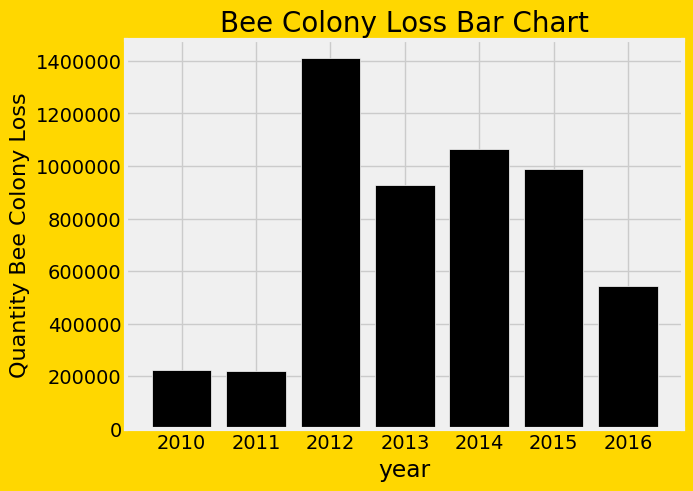

In [0]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016]	 
y =[221771.2,219336.5,1410201.79,928581.39,1065320.84,987130.54,541317.33]

x = np.arange(7)
money = [221771.2,219336.5,1410201.79,928581.39,1065320.84,987130.54,541317.33]
fig, ax1 = plt.subplots()

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')
ax.set_xlabel('Rating', fontsize=9, fontweight='bold', labelpad=10)



#fig = plt.figure()
fig.patch.set(facecolor='#FFD700')
plt.style.use(['dark_background'])
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('year')

plt.ylabel('Quantity Bee Colony Loss',fontsize=16)
plt.bar(x, height=y,color='black',edgecolor='white')
plt.xticks(x,( 2010, 2011, 2012, 2013, 2014, 2015, 2016))
plt.title('Bee Colony Loss Bar Chart',fontsize=20)
plt.show()
 

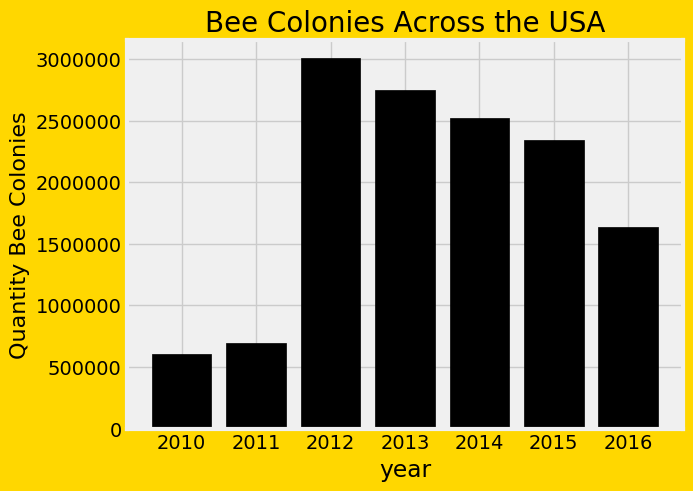

In [0]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016]	 
y =[603574,694292,3006214,2750691,2517608,2341662,1640309]

x = np.arange(7)
money = [603574,694292,3006214,2750691,2517608,2341662,1640309]


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)
fig, ax1 = plt.subplots()

formatter = FuncFormatter(millions)
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')
ax.set_xlabel('Rating', fontsize=9, fontweight='bold', labelpad=10)
ax.set(facecolor='white')

#fig = plt.figure()
fig.patch.set(facecolor='#FFD700')
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('year')

plt.ylabel('Quantity Bee Colonies',fontsize=16)
plt.bar(x, height=y,color='black',edgecolor='black')
plt.xticks(x,( 2010, 2011, 2012, 2013, 2014, 2015, 2016))
plt.title('Bee Colonies Across the USA',fontsize=20)
plt.show()

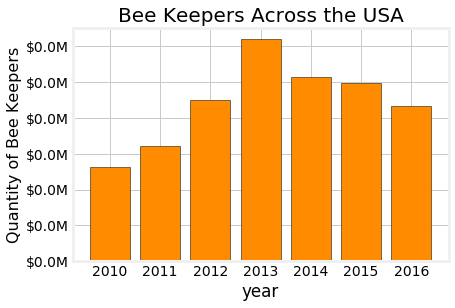

In [0]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016]	 
y =[2630,3223,4516,6202,5134,4973,4324]

x = np.arange(7)



# def millions(x, pos):
#     'The two args are the value and tick position'
#     return '$%1.1fM' % (x * 1e-6)

fig, ax = plt.subplots()
formatter = FuncFormatter(millions)
ax.set(facecolor='white')

#fig = plt.figure()
fig.patch.set(facecolor='white')
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('year')

plt.ylabel('Quantity of Bee Keepers',fontsize=16)
plt.bar(x, height=y,color='#FF8C00',edgecolor='black')
plt.xticks(x,( 2010, 2011, 2012, 2013, 2014, 2015, 2016))
plt.title('Bee Keepers Across the USA',fontsize=20)
plt.show()

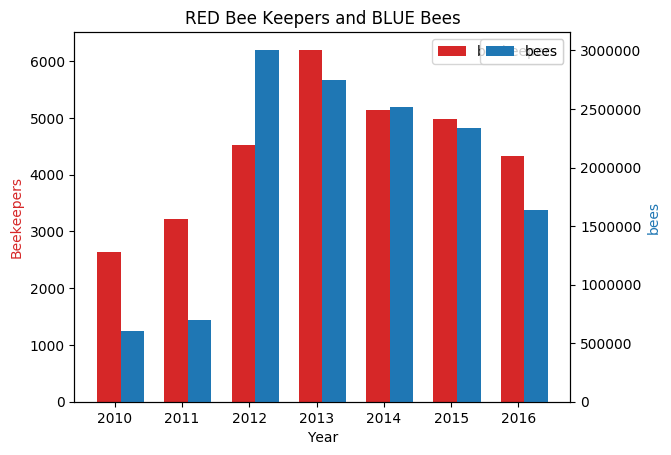

In [0]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

N=7  # number if items in list

x = [2630,3223,4516,6202,5134,4973,4324]
y = [603574,694292,3006214,2750691,2517608,2341662,1640309]

fig, ax1 = plt.subplots()
color = 'tab:red'                             # bars      red
ind = np.arange(N) 
width = 0.35       
ax1.bar(ind, x, width, label='beekeepers', color=color) # bars red
ax2 = ax1.twinx()                             # bars      blue
ax2.bar(ind + width, y, width,label='bees')   # bars      blue
ax1.set_ylabel('Beekeepers',color=color)       # beekeeper red
color = 'tab:blue'                            # bees     blue
ax2.set_ylabel('bees', color=color)           # bees      label

ax1.set_xlabel('Year')
plt.title('RED Bee Keepers and BLUE Bees')#, color=color)
plt.xticks(ind + width / 4, (2010, 2011, 2012, 2013, 2014, 2015, 2016))
plt.legend(loc='best')
ax1.legend();

<Figure size 640x480 with 0 Axes>

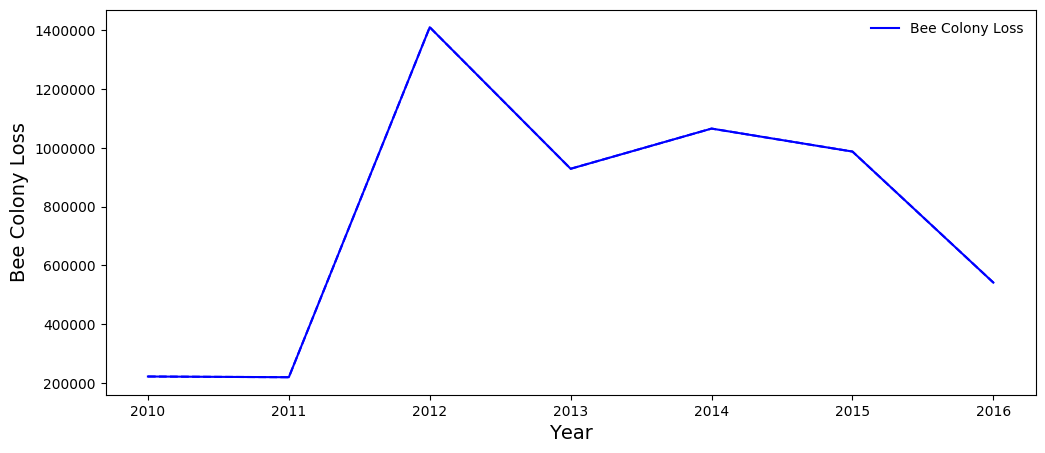

In [0]:
import matplotlib.pyplot as plt
# Plot the mean results
# Define labels, positions, bar heights and error bar heights

fig = plt.figure()
fig, ax = plt.subplots(figsize=(12, 5))
plt.rcParams.update(plt.rcParamsDefault)
x1 = [2010, 2011, 2012, 2013, 2014, 2015, 2016]

y2 =[221771.2,219336.5,1410201.79,928581.39,1065320.84,987130.54,541317.33] 
ax.plot(x1, y2, color = 'blue', label="Bee Colony Loss")
plt.errorbar(x1, y2, linestyle="--", color = 'blue')

plt.legend(frameon=False)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bee Colony Loss', fontsize=14)
plt.show()

Bat Man